In [1]:
from sklearn.ensemble import RandomForestRegressor
import os
import json
import pickle
from collections import defaultdict
from collections import Counter
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import gc
from sklearn.inspection import permutation_importance
# training and permutation importance code taken from sklearn

In [2]:
with open('mappings/RF/data_dict2.pkl', 'rb') as fp:
    data_dict = pickle.load(fp)

In [3]:
len(data_dict)

409039

In [12]:
data_dict[962001]

[1.9835831548893639,
 0.43318300041595537,
 93.65003950517811,
 143,
 29174668,
 204018.65734265733,
 40,
 25,
 1]

In [13]:
data = np.array([v for k,v in data_dict.items()])
data[:3]

array([[1.97822984e+00, 2.52062427e-01, 8.72504887e+01, 5.20000000e+01,
        1.15328580e+07, 2.21785731e+05, 4.70000000e+01, 5.00000000e+01,
        1.00000000e+00],
       [1.98251249e+00, 2.25769163e-01, 2.63111262e+01, 3.90000000e+01,
        1.16681800e+07, 2.99184103e+05, 2.30000000e+01, 2.70000000e+01,
        1.00000000e+00],
       [1.99500357e+00, 5.28044397e-01, 5.88093103e+00, 6.40000000e+01,
        1.40338890e+07, 2.19279516e+05, 5.10000000e+01, 4.60000000e+01,
        1.00000000e+00]])

In [14]:
del data_dict
gc.collect()

0

In [15]:
m = [x[-1] > 1 for x in data]
data = data[m]

In [16]:
len(data)

81201

In [17]:
#l1, l2, derived popularity, number_of_tracks  , total_duration , avg_song_length , num albums
x = data[:, :-1]
y = data[:,-1]
print(x[:2], y[:2], data[:2])

[[1.98643826e+00 2.46500032e-01 1.43684248e+01 1.70000000e+01
  4.24636700e+06 2.49786294e+05 1.60000000e+01 1.60000000e+01]
 [1.97287652e+00 2.66156527e-01 1.86384247e+02 7.20000000e+01
  1.64029660e+07 2.27818972e+05 6.00000000e+01 7.20000000e+01]] [2. 2.] [[1.98643826e+00 2.46500032e-01 1.43684248e+01 1.70000000e+01
  4.24636700e+06 2.49786294e+05 1.60000000e+01 1.60000000e+01
  2.00000000e+00]
 [1.97287652e+00 2.66156527e-01 1.86384247e+02 7.20000000e+01
  1.64029660e+07 2.27818972e+05 6.00000000e+01 7.20000000e+01
  2.00000000e+00]]


In [18]:
x = np.delete(x,1,1)

In [19]:
#l1, derived popularity, number_of_tracks  , total_duration , avg_song_length , num albums
x[:,3] = x[:,3]*1.66667e-5
x[:,4] = x[:,4]*1.66667e-5

In [20]:
np.std(x, axis=1)

array([ 21.46721035,  92.13637446,  19.40300492, ...,  55.01750978,
       146.1097477 ,  66.66515858])

In [21]:
np.max(x)

1776.3115026159

In [22]:
data = x

### Train Test Split

In [23]:
# y_train = np.log(y)
# x_train = x
# # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01, random_state=42)

In [24]:
# print(len(x_train), len(x_test))

In [25]:
clf = RandomForestRegressor(n_estimators=100, verbose=3)
clf.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomForestRegressor(verbose=3)

In [26]:
clf.score(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


0.8338105045312542

In [28]:
# number_of_tracks, total_duration, avg_song_length, albums, total_author_count
feats = ['L1', 'Art. Pop.', '#Tracks', 'Tot. Dur', 'Avg Dur', '# Albums', '# Authors']

In [29]:
result = permutation_importance(
    clf, x, y, n_repeats=10, random_state=42, 
)
importances = result.importances_mean


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finish

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finish

In [30]:
imp = sorted(list(zip(feats, importances)), key = lambda x: x[1], reverse=True)

In [31]:
clf.feature_importances_

array([0.05473888, 0.33969011, 0.08694357, 0.23695107, 0.15447743,
       0.06089654, 0.0663024 ])

Text(0.5, 0, 'Feature')

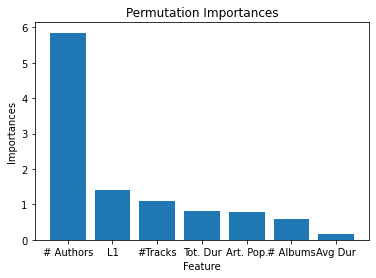

In [32]:
buckets = [x[0] for x in imp]
vals = [x[1] for x in imp]
plt.bar(buckets, vals)
plt.title('Permutation Importances')
plt.ylabel('Importances')
plt.xlabel('Feature')

In [33]:
for x,y in zip(buckets, vals):
    print(x, ' & ', np.around(y,3), '\\\ \n \hline')

# Authors  &  5.847 \\ 
 \hline
L1  &  1.396 \\ 
 \hline
#Tracks  &  1.098 \\ 
 \hline
Tot. Dur  &  0.813 \\ 
 \hline
Art. Pop.  &  0.798 \\ 
 \hline
# Albums  &  0.581 \\ 
 \hline
Avg Dur  &  0.152 \\ 
 \hline


Text(0.5, 0, 'Total Playlist Duration (minutes)')

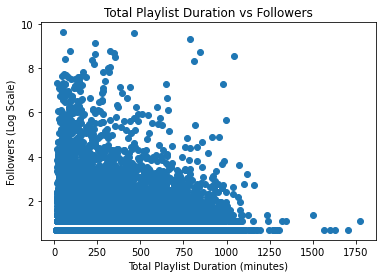

In [263]:
plt.scatter(x[:,3],np.log(y))
plt.title('Total Playlist Duration vs Followers')
plt.ylabel('Followers (Log Scale)')
plt.xlabel('Total Playlist Duration (minutes)')

In [11]:
a1 = clf.feature_importances_

In [12]:
#l1,  derived popularity, number_of_tracks  , total_duration , avg_song_length , num albums
del clf
gc.collect()

24

In [13]:
clf2 = RandomForestRegressor(n_estimators=100, verbose=3)
# clf2.fit(x, np.log(y))

In [14]:
y2 = np.ceil(np.log(y))
clf2.fit(x,y2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   49.3s finished


RandomForestRegressor(verbose=3)

In [15]:
clf2.score(x,y2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


0.8524056472216412

In [16]:
a2 = clf2.feature_importances_

In [17]:
del x
del y
gc.collect()

72

In [18]:
# just data with Q3 study
#l1, derived popularity, number_of_tracks  , total_duration , avg_song_length , num albums
x = data[:, 3:-1]
y = data[:,-1]
print(x[:2], y[:2], data[:2])


[[1.70000000e+01 4.24636700e+06 2.49786294e+05 1.60000000e+01]
 [7.20000000e+01 1.64029660e+07 2.27818972e+05 6.00000000e+01]] [2. 2.] [[1.98643826e+00 2.46500032e-01 1.43684248e+01 1.70000000e+01
  4.24636700e+06 2.49786294e+05 1.60000000e+01 2.00000000e+00]
 [1.97287652e+00 2.66156527e-01 1.86384247e+02 7.20000000e+01
  1.64029660e+07 2.27818972e+05 6.00000000e+01 2.00000000e+00]]


In [19]:
del clf2

gc.collect()

0

In [20]:
clf3 = RandomForestRegressor(n_estimators=100, verbose=3)
clf3.fit(x,y)
print(clf3.score(x,y))
a3 = clf3.feature_importances_

building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   33.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


0.8302857342030828


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


In [21]:
del clf3

gc.collect()

72

In [22]:
clf4 = RandomForestRegressor(n_estimators=100, verbose=3)
y2 = np.ceil(np.log(y))
clf4.fit(x,y2)
print(clf4.score(x,y2))
a4 = clf4.feature_importances_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   36.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


0.838470243641736


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


In [23]:
del clf4

gc.collect()

72

In [24]:
padlen = len(a1)

In [25]:
print(padlen)

6


In [26]:
print(a3)
a3 = np.pad(a3, pad_width=(padlen-len(a3),0), mode='constant', constant_values=0)
print(a3)

[0.06647944 0.3972209  0.45767163 0.07862802]
[0.         0.         0.06647944 0.3972209  0.45767163 0.07862802]


In [27]:
a4 = np.pad(a4, pad_width=(padlen-len(a4),0), mode='constant', constant_values=0)
print(a4)

[0.         0.         0.07564225 0.37917737 0.38963045 0.15554993]


In [28]:
print(a3)

[0.         0.         0.06647944 0.3972209  0.45767163 0.07862802]


In [29]:
for x1,x2,x3,x4 in zip(a1,a2,a3,a4):
    print(x1, ' & ', x2, ' & ', x3, ' & ', x4, ' \\\ \n \hline ',)

0.05677010608804958  &  0.14568719399234697  &  0.0  &  0.0  \\ 
 \hline 
0.3329957958442248  &  0.2347224248467316  &  0.0  &  0.0  \\ 
 \hline 
0.0572609373192454  &  0.0810532541961581  &  0.06647943727118413  &  0.07564225313581777  \\ 
 \hline 
0.23505782186599894  &  0.20632903092740523  &  0.39722090406748906  &  0.3791773677355647  \\ 
 \hline 
0.24506160737149443  &  0.21863760694668113  &  0.45767163400161415  &  0.3896304498954285  \\ 
 \hline 
0.07285373151098701  &  0.113570489090677  &  0.07862802465971272  &  0.155549929233189  \\ 
 \hline 
